In [1]:
from numpy import *
import pandas as pd                       #data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [2]:
ad=pd.read_csv('advertising.csv')

In [3]:
ad.describe()
ad.info()
ad.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


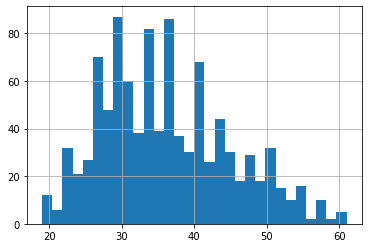

In [10]:
ad['Age'].hist(bins=30)
ad.isnull()

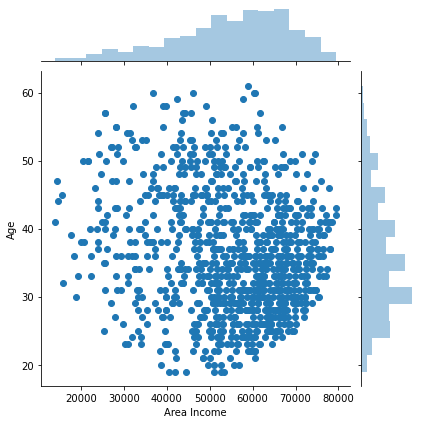

In [5]:
sns.jointplot(y='Age', x='Area Income',data=ad)

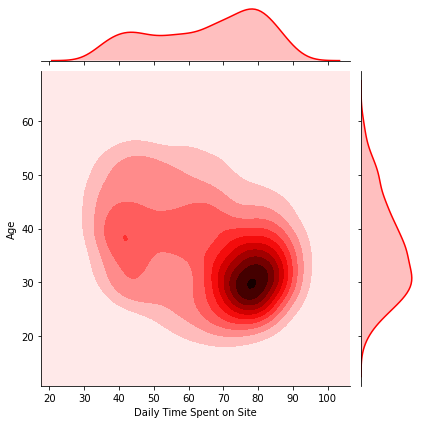

In [6]:
sns.jointplot(y='Age', x='Daily Time Spent on Site',data=ad,kind='kde',color='red')

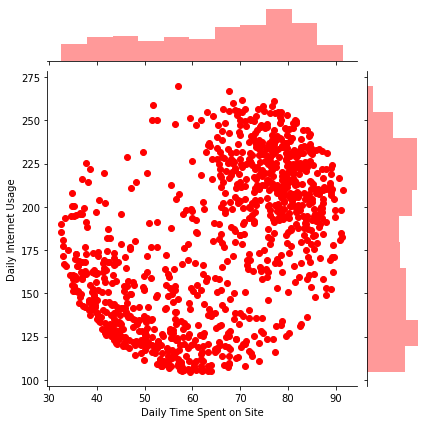

In [7]:
sns.jointplot(y='Daily Internet Usage', x='Daily Time Spent on Site',data=ad,color='red')

In [25]:
from sklearn.model_selection import train_test_split
X=ad.drop(['Clicked on Ad'],axis=1)
y=ad['Clicked on Ad']
X.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X
from sklearn.linear_model import LogisticRegression
z=LogisticRegression()

In [31]:
z.fit(X_train,y_train)

LogisticRegression()

In [32]:
pre=z.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pre))
print(confusion_matrix(y_test,pre))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

[[156   6]
 [ 25 143]]


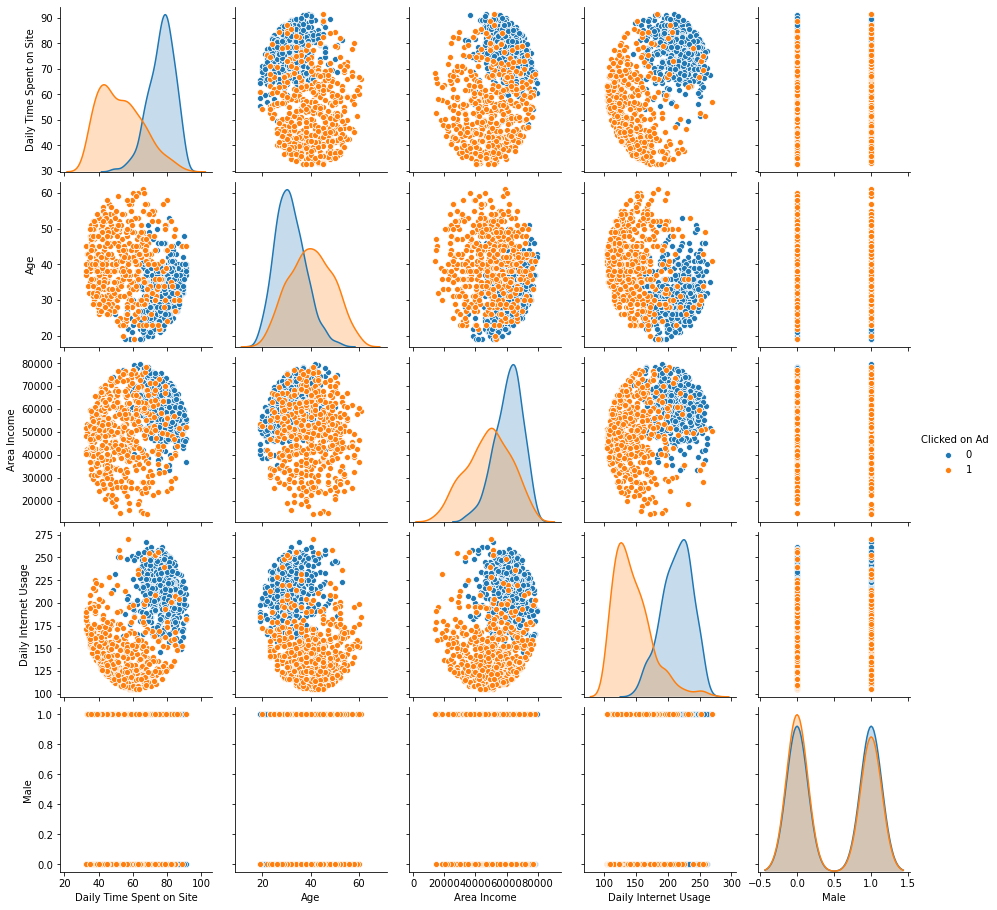

In [34]:
sns.pairplot(ad,hue='Clicked on Ad')